### Vamos utilizar um modelo de Regressão Linear para prever as notas dos alunos com base em diversas métricas.
### A nota que queremos prever é o G3


In [1]:
library(readr)

Warning message:
"package 'readr' was built under R version 4.2.3"


In [2]:
#Arquivo separado por ; utilizar read_csv2
estudantes_df <- read_csv2('estudantes.csv')

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 395 Columns: 33
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ";"
chr (17): school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardi...
dbl (16): age, Medu, Fedu, traveltime, studytime, failures, famrel, freetime...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
#Carregando um DF com informações sobre estudantes, relacionadas ao desempenho acadêmico e comportamento.
head(estudantes_df)
dim(estudantes_df)

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15


[1] 395  33

In [4]:
#Estrutura das variáveis
str(estudantes_df)

spc_tbl_ [395 × 33] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ school    : chr [1:395] "GP" "GP" "GP" "GP" ...
 $ sex       : chr [1:395] "F" "F" "F" "F" ...
 $ age       : num [1:395] 18 17 15 15 16 16 16 17 15 15 ...
 $ address   : chr [1:395] "U" "U" "U" "U" ...
 $ famsize   : chr [1:395] "GT3" "GT3" "LE3" "GT3" ...
 $ Pstatus   : chr [1:395] "A" "T" "T" "T" ...
 $ Medu      : num [1:395] 4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu      : num [1:395] 4 1 1 2 3 3 2 4 2 4 ...
 $ Mjob      : chr [1:395] "at_home" "at_home" "at_home" "health" ...
 $ Fjob      : chr [1:395] "teacher" "other" "other" "services" ...
 $ reason    : chr [1:395] "course" "course" "other" "home" ...
 $ guardian  : chr [1:395] "mother" "father" "mother" "mother" ...
 $ traveltime: num [1:395] 2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : num [1:395] 2 2 2 3 2 2 2 2 2 2 ...
 $ failures  : num [1:395] 0 0 3 0 0 0 0 0 0 0 ...
 $ schoolsup : chr [1:395] "yes" "no" "yes" "no" ...
 $ famsup    : chr [1:395] "no" "yes" "no" "yes" ...
 $

### Informações gerais sobre as variáveis:

school: A escola à qual o aluno pertence (provavelmente "GP" ou outra).  
sex: O gênero do aluno (por exemplo, "F" para feminino).  
age: A idade do aluno.  
address: O tipo de endereço do aluno (por exemplo, "U" para urbano).
famsize: O tamanho da família do aluno (por exemplo, "GT3" para mais de três membros da família).  
Pstatus: O status de coabitação dos pais do aluno (por exemplo, "T" para morar juntos).  
Medu e Fedu: Níveis de educação da mãe e do pai, respectivamente.  
Mjob e Fjob: O trabalho da mãe e do pai do aluno.  
reason: A razão para escolher a escola.  
guardian: O guardião do aluno.  
traveltime: Tempo de viagem da casa para a escola.  
studytime: Tempo de estudo semanal.  
failures: Número de reprovações anteriores.  
schoolsup: Suporte educacional extra fornecido pela escola.  
famsup: Suporte educacional extra fornecido pela família.  
paid: Aulas extras pagas.  
activities: Participação em atividades extracurriculares.  
nursery: Se frequentou a creche na infância.  
higher: Se deseja prosseguir estudos superiores.  
internet: Acesso à internet em casa.  
romantic: Se está em um relacionamento romântico.  
famrel: Qualidade das relações familiares.  
freetime: Tempo livre após a escola.  
goout: Frequência de saídas com amigos.  
Dalc e Walc: Consumo de álcool durante a semana e nos fins de semana, respectivamente.  
health: Estado de saúde atual.  
absence: Número de faltas na escola.  
G1: Primeira nota;  
G2: Segunda nota;  
G3: Nota final- variável de saída.

In [5]:
#Resumo estatístico
summary(estudantes_df)

    school              sex                 age         address         
 Length:395         Length:395         Min.   :15.0   Length:395        
 Class :character   Class :character   1st Qu.:16.0   Class :character  
 Mode  :character   Mode  :character   Median :17.0   Mode  :character  
                                       Mean   :16.7                     
                                       3rd Qu.:18.0                     
                                       Max.   :22.0                     
   famsize            Pstatus               Medu            Fedu      
 Length:395         Length:395         Min.   :0.000   Min.   :0.000  
 Class :character   Class :character   1st Qu.:2.000   1st Qu.:2.000  
 Mode  :character   Mode  :character   Median :3.000   Median :2.000  
                                       Mean   :2.749   Mean   :2.522  
                                       3rd Qu.:4.000   3rd Qu.:3.000  
                                       Max.   :4.000   Max.   :

In [6]:
#Verificando valores nulos
colSums(is.na(estudantes_df))

school        sex        age    address    famsize    Pstatus       Medu 
         0          0          0          0          0          0          0 
      Fedu       Mjob       Fjob     reason   guardian traveltime  studytime 
         0          0          0          0          0          0          0 
  failures  schoolsup     famsup       paid activities    nursery     higher 
         0          0          0          0          0          0          0 
  internet   romantic     famrel   freetime      goout       Dalc       Walc 
         0          0          0          0          0          0          0 
    health   absences         G1         G2         G3 
         0          0          0          0          0

In [7]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 4.2.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [8]:
#Como queremos criar um modelo de regressão linear usaremos apenas as variaveis numéricas:
estudantes_df_numericas <- select_if(estudantes_df, is.numeric)
head(estudantes_df_numericas)
dim(estudantes_df_numericas)

age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10
16,4,3,1,2,0,5,4,2,1,2,5,10,15,15,15


[1] 395  16

In [9]:
library(corrplot)

Warning message:
"package 'corrplot' was built under R version 4.2.3"
corrplot 0.92 loaded



In [10]:
#matriz de correlação
matriz_cor <-cor(estudantes_df_numericas)
matriz_cor

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000000,-0.163658419,-0.163438069,0.070640721,-0.004140037,0.24366538,0.053940096,0.01643439,0.126963880,0.131124605,0.11727605,-0.062187369,0.17523008,-0.06408150,-0.14347405,-0.16157944
Medu,-0.163658419,1.000000000,0.623455112,-0.171639305,0.064944137,-0.23667996,-0.003914458,0.03089087,0.064094438,0.019834099,-0.04712346,-0.046877829,0.10028482,0.20534100,0.21552717,0.21714750
Fedu,-0.163438069,0.623455112,1.000000000,-0.158194054,-0.009174639,-0.25040844,-0.001369727,-0.01284553,0.043104668,0.002386429,-0.01263102,0.014741537,0.02447289,0.19026994,0.16489339,0.15245694
traveltime,0.070640721,-0.171639305,-0.158194054,1.000000000,-0.100909119,0.09223875,-0.016807986,-0.01702494,0.028539674,0.138325309,0.13411575,0.007500606,-0.01294378,-0.09303999,-0.15319796,-0.11714205
studytime,-0.004140037,0.064944137,-0.009174639,-0.100909119,1.000000000,-0.17356303,0.039730704,-0.14319841,-0.063903675,-0.196019263,-0.25378473,-0.075615863,-0.06270018,0.16061192,0.13588000,0.09781969
failures,0.243665377,-0.236679963,-0.250408444,0.092238746,-0.173563031,1.00000000,-0.044336626,0.09198747,0.124560922,0.136046931,0.14196203,0.065827282,0.06372583,-0.35471761,-0.35589563,-0.36041494
famrel,0.053940096,-0.003914458,-0.001369727,-0.016807986,0.039730704,-0.04433663,1.000000000,0.15070144,0.064568411,-0.077594357,-0.11339731,0.094055728,-0.04435409,0.02216832,-0.01828135,0.05136343
freetime,0.016434389,0.030890867,-0.012845528,-0.017024944,-0.143198407,0.09198747,0.150701444,1.00000000,0.285018715,0.209000848,0.14782181,0.075733357,-0.05807792,0.01261293,-0.01377714,0.01130724
goout,0.126963880,0.064094438,0.043104668,0.028539674,-0.063903675,0.12456092,0.064568411,0.28501871,1.000000000,0.266993848,0.42038575,-0.009577254,0.04430222,-0.14910397,-0.16225003,-0.13279147
Dalc,0.131124605,0.019834099,0.002386429,0.138325309,-0.196019263,0.13604693,-0.077594357,0.20900085,0.266993848,1.000000000,0.64754423,0.077179582,0.11190803,-0.09415879,-0.06412018,-0.05466004


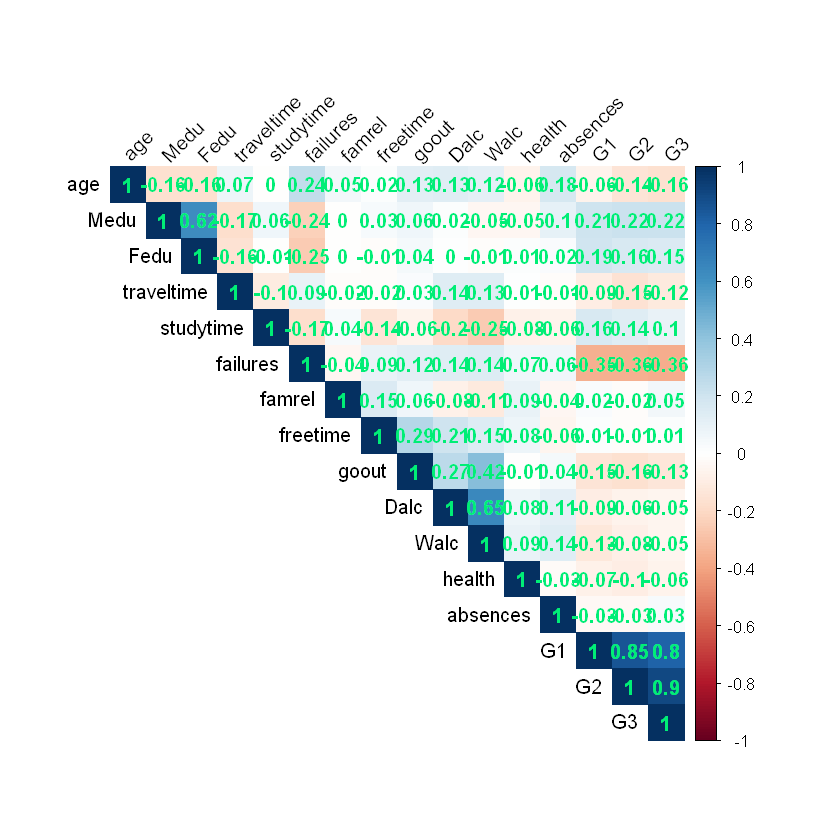

In [11]:
corrplot(matriz_cor, method = 'color', type = 'upper', addCoef.col = 'springgreen2', tl.col = "black", tl.srt = 45) 

In [12]:
library('corrgram')

Warning message:
"package 'corrgram' was built under R version 4.2.3"


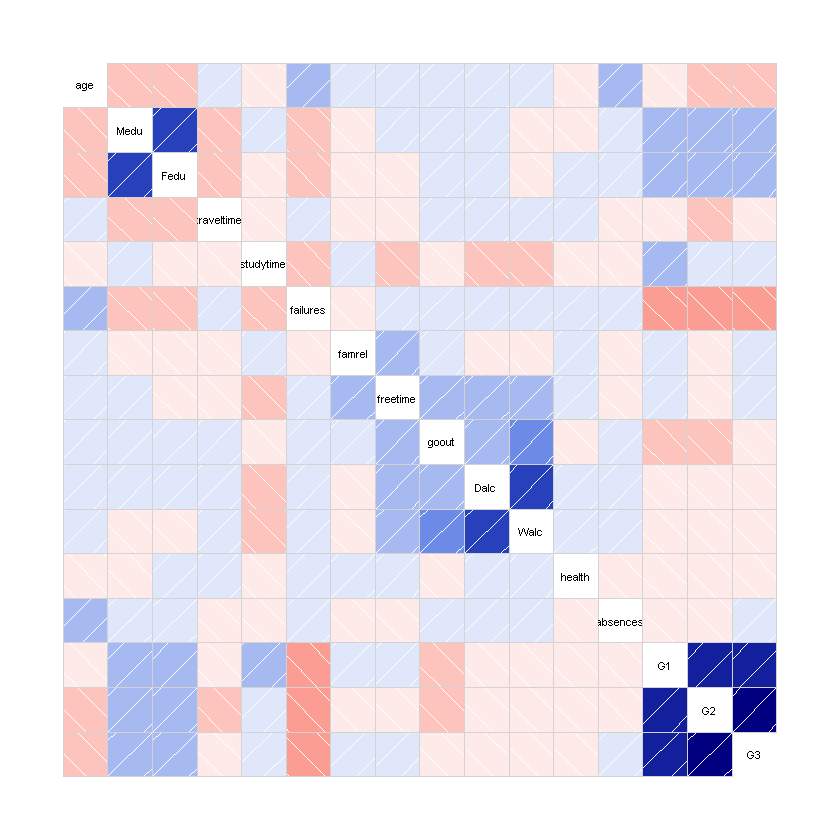

In [13]:
corrgram(estudantes_df_numericas)

### Treinamento do Modelo

In [14]:
#Vamos utilizar a função sample.split do pacote caTools para realizar a divisão do df em dados de treino e dados de teste.
library(caTools)

Warning message:
"package 'caTools' was built under R version 4.2.3"


In [15]:
# Dividindo os dados em treino e teste com base na variável age
set.seed(101)  # para reprodutibilidade
amostra <- sample.split(estudantes_df_numericas$age, SplitRatio = 0.70)  #70% dos dados salvo em amostra

In [16]:
#Criando dados de treino (70% dos dados)
treino <- subset(estudantes_df_numericas, amostra ==TRUE)
head(treino)
dim(treino)

age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10
16,4,3,1,2,0,5,4,2,1,2,5,10,15,15,15
16,2,2,1,2,0,4,4,4,1,1,3,0,12,12,11
15,3,2,1,2,0,4,2,2,1,1,1,0,16,18,19
15,3,4,1,2,0,5,5,1,1,1,5,0,14,15,15


[1] 277  16

In [17]:
teste <-subset(estudantes_df_numericas, amostra == FALSE)
head(teste)
dim(teste)

age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
17,4,4,2,2,0,4,1,4,1,1,1,6,6,5,6
15,2,2,1,3,0,4,5,2,1,1,3,0,14,16,16
16,4,4,1,1,0,4,4,4,1,2,2,4,14,14,14


[1] 118  16

In [18]:
#Gerando o primeiro modelo usando todos os atributos
modelo1<-lm(G3 ~., data = treino)
summary(modelo1)


Call:
lm(formula = G3 ~ ., data = treino)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.4802 -0.5834  0.3027  1.0286  4.2088 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.24502    1.77602  -0.138 0.890378    
age         -0.25460    0.09680  -2.630 0.009043 ** 
Medu         0.24740    0.13652   1.812 0.071119 .  
Fedu        -0.17789    0.13378  -1.330 0.184755    
traveltime   0.32978    0.17536   1.881 0.061140 .  
studytime   -0.12330    0.13982  -0.882 0.378673    
failures    -0.28488    0.18630  -1.529 0.127446    
famrel       0.46394    0.13137   3.531 0.000489 ***
freetime    -0.12338    0.12853  -0.960 0.337996    
goout        0.10291    0.12038   0.855 0.393426    
Dalc        -0.16858    0.16688  -1.010 0.313338    
Walc         0.16531    0.12627   1.309 0.191626    
health       0.04367    0.08692   0.502 0.615800    
absences     0.05394    0.01630   3.308 0.001071 ** 
G1           0.11899    0.06906   1.723 0.086072 .  


In [19]:
#Usando as notas G1 e G2
modelo2 <- lm(G3 ~ G1 + G2, data = treino)
summary(modelo2)


Call:
lm(formula = G3 ~ G1 + G2, data = treino)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5559 -0.4030  0.3143  1.0137  3.4715 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.87861    0.40782  -4.606 6.28e-06 ***
G1           0.12976    0.07050   1.841   0.0668 .  
G2           1.01370    0.06228  16.275  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.967 on 274 degrees of freedom
Multiple R-squared:  0.8211,	Adjusted R-squared:  0.8198 
F-statistic: 628.8 on 2 and 274 DF,  p-value: < 2.2e-16


In [20]:
#Usando as faltas como variável preditora
modelo3 <- lm(G3 ~ absences, treino)
summary(modelo3)


Call:
lm(formula = G3 ~ absences, data = treino)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.4165  -2.4376   0.5201   3.5095   9.5412 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.41648    0.35607  29.254   <2e-16 ***
absences     0.01057    0.03897   0.271    0.786    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.641 on 275 degrees of freedom
Multiple R-squared:  0.0002675,	Adjusted R-squared:  -0.003368 
F-statistic: 0.07357 on 1 and 275 DF,  p-value: 0.7864


In [21]:
#Usando o número de reprovações anteriores:
modelo4 <- lm(G3 ~ failures, treino)
summary(modelo4)


Call:
lm(formula = G3 ~ failures, data = treino)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.2865  -2.2865  -0.2865   3.1920   8.7135 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  11.2865     0.2830  39.885  < 2e-16 ***
failures     -2.4928     0.3612  -6.901 3.55e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.285 on 275 degrees of freedom
Multiple R-squared:  0.1476,	Adjusted R-squared:  0.1445 
F-statistic: 47.63 on 1 and 275 DF,  p-value: 3.55e-11


In [22]:
# Usando os níveis de educação da mãe
modelo5 <- lm(G3 ~ Medu, treino)
summary(modelo5)


Call:
lm(formula = G3 ~ Medu, data = treino)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.813  -1.813   0.371   3.187   9.371 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7.4452     0.7471   9.966  < 2e-16 ***
Medu          1.0919     0.2509   4.351 1.91e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.49 on 275 degrees of freedom
Multiple R-squared:  0.06442,	Adjusted R-squared:  0.06101 
F-statistic: 18.93 on 1 and 275 DF,  p-value: 1.909e-05


### Vamos escolher o modelo 1 que apresentou maior coeficiente de determinação.

In [23]:
#Verificando os resíduos
residuos <- residuals(modelo1)

In [24]:
#Convertendo para um dataframe
residuos <- data.frame(residuos)
head(residuos)

,residuos
,<dbl>
1,1.0932809
2,0.8587300
3,-1.2071287
4,-0.4331053
5,0.5353046
6,0.0135061


In [25]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 4.2.3"


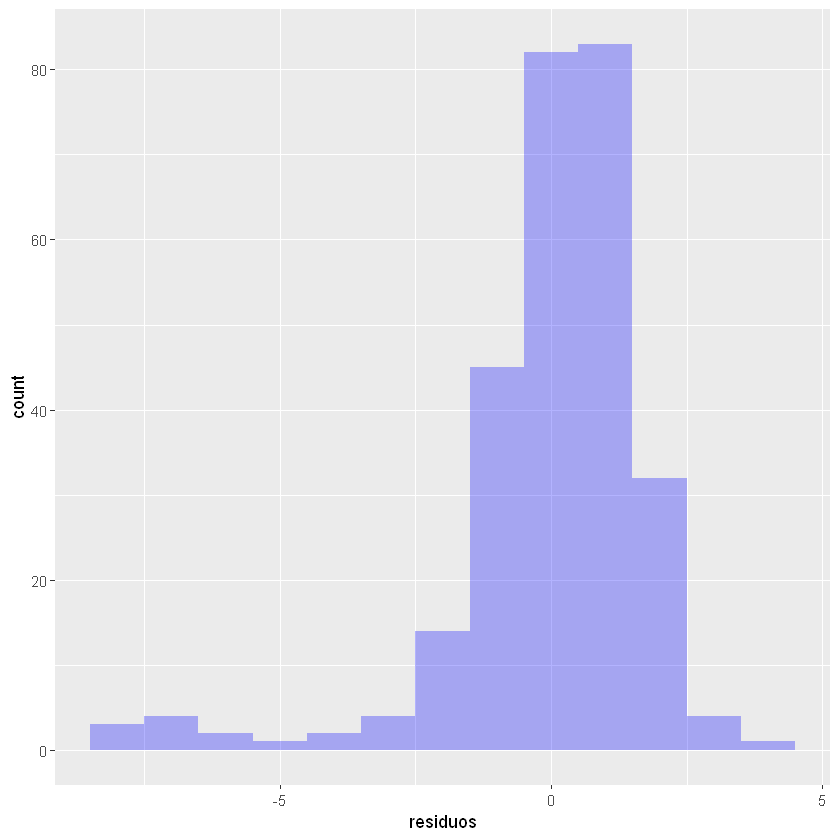

In [26]:
ggplot(residuos, aes(residuos)) +
geom_histogram(fill= 'blue',
              alpha=0.3, #Transparência das barras
              binwidth=1) #largura dos bins

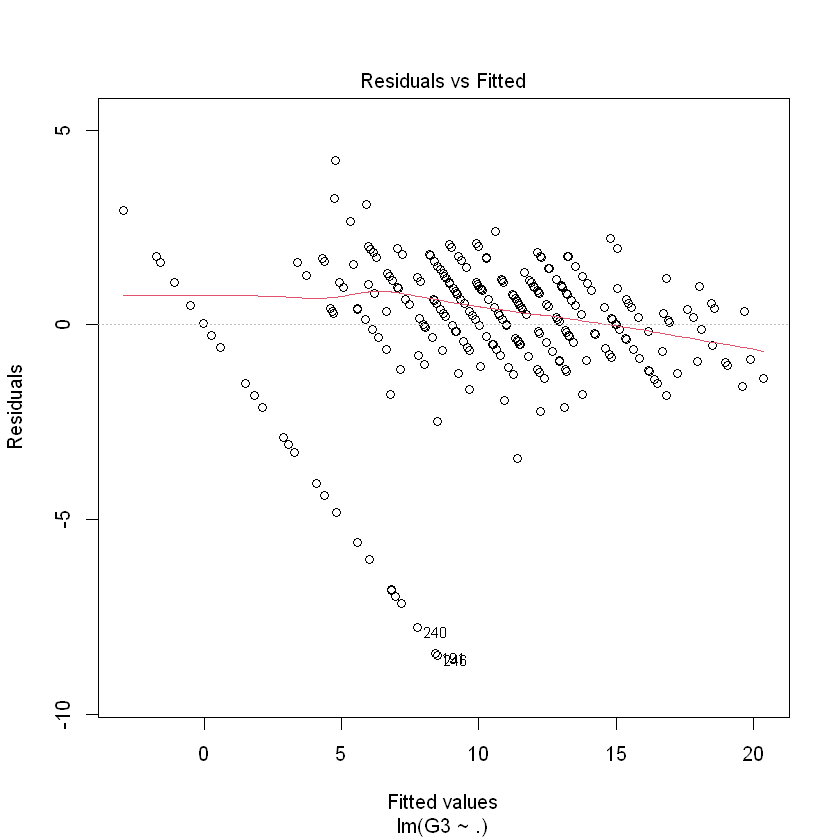

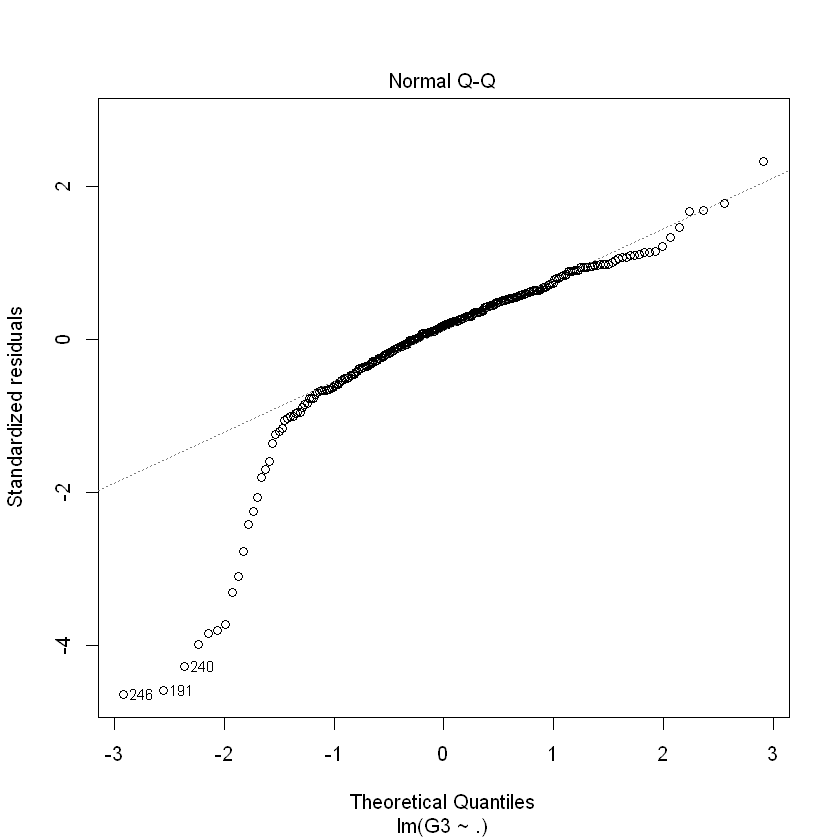

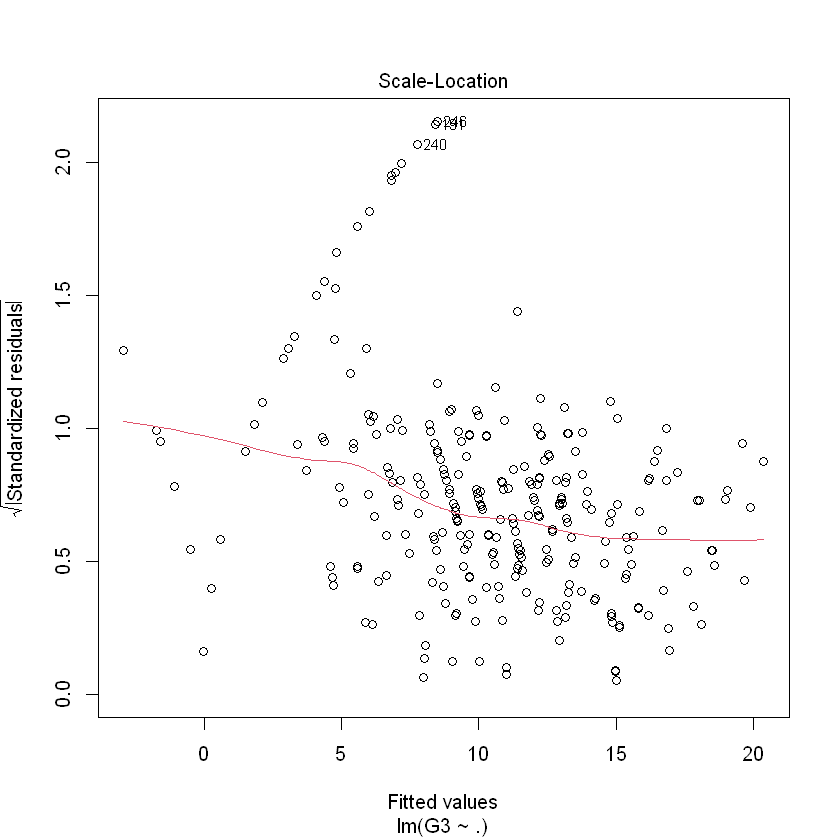

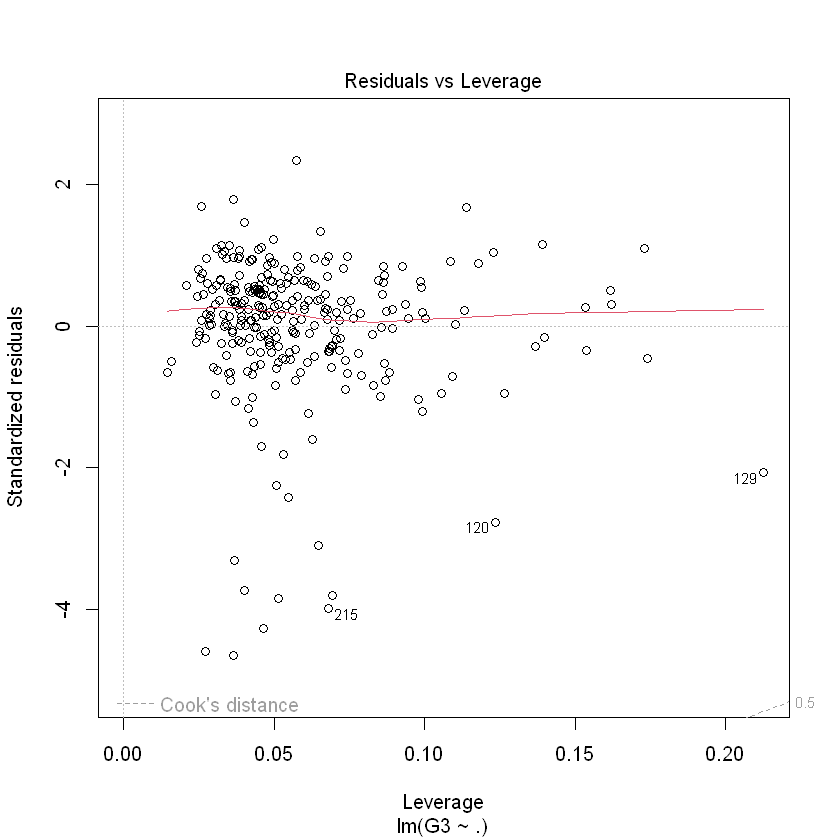

In [27]:
#Plot do modelo
plot(modelo1)

In [28]:
#Fazendo previsões
previsao <- predict(modelo1, teste)

In [29]:
#Visualizando valores previstos e observados
resultados <- cbind(previsao, teste$G3)
colnames(resultados) <-c('Previsao', ' Real')
head(resultados, 10)

,Previsao,Real
1,3.859511,6
2,6.720878,10
3,14.221737,15
4,4.423062,6
5,15.539879,16
6,14.304127,14
7,9.800991,10
8,15.428621,16
9,10.976549,11
10,10.957304,12


In [30]:
resultados <- data.frame(resultados)
class(resultados)
head(resultados)
dim(resultados)

[1] "data.frame"

,Previsao,X.Real
,<dbl>,<dbl>
1,3.859511,6
2,6.720878,10
3,14.221737,15
4,4.423062,6
5,15.539879,16
6,14.304127,14


[1] 118   2

In [31]:
#Trando valores negativos, se encontrare valores negativos mudar para zero
resultados$Previsao[resultados$Previsao < 0] <-0

In [32]:
#Checando valores negativos
any(resultados$Previsao < 0)

[1] FALSE

### Calculando os erros do modelo
#### Vamos medir o quanto os valores previstos de um modelo diferem dos valores reais e consequentemente avaliar o desempenho de regressão
- MSE (Mean Squared Error):O MSE é calculado como a média dos quadrados dos erros entre os valores previstos pelo modelo e os valores reais.

 

In [33]:
#Calculando o erro médio:
MSE <- mean((resultados$X.Real - resultados$Previsao)^2)
MSE

[1] 4.035437

- RMSE (Root Mean Squared Error): O RMSE é simplesmente a raiz quadrada do MSE. Ele tem a vantagem de estar na mesma unidade que a variável de interesse, tornando mais fácil a interpretação.

In [34]:
RMSE <- MSE^0.5
RMSE

[1] 2.00884

- SST (Sum of Squares Total): SST representa a soma dos quadrados das diferenças entre cada valor observado e a média dos valores observados. Ele mede a variabilidade total nos dados.

In [35]:
SST <- sum((mean(estudantes_df_numericas$G3) - resultados$X.Real)^2)
SST

[1] 2343.769

- SSE (Sum of Squares Error):SSE representa a soma dos quadrados das diferenças entre cada valor observado e o valor previsto pelo modelo. Ele mede a variabilidade que não é explicada pelo modelo.

In [36]:
SSE <- sum((resultados$Previsao - resultados$X.Real)^2)
SSE

[1] 476.1816

- O coeficiente de determinação, frequentemente chamado de R² (R ao quadrado), é uma medida estatística que indica a proporção da variabilidade na variável de resposta que é explicada pelo modelo estatístico. Em outras palavras, o R² avalia o quão bem as previsões do modelo se ajustam aos dados observados. Ele varia de 0 a 1, onde 0 indica que o modelo não explica nenhuma variabilidade e 1 indica que o modelo explica toda a variabilidade.

In [37]:
R2 <- 1-(SSE/SST)
R2

[1] 0.7968308

In [38]:
cat('Desta forma, um coeficiente de determinação (R²) de', R2, 'indica que aproximadamente', R2*100, 'da variabilidade na 
variável de resposta é explicada pelo seu modelo de regressão. Em outras palavras, o modelo é capaz de explicar uma proporção 
significativa da variação nos dados.')

Desta forma, um coeficiente de determinação (R²) de 0.7968308 indica que aproximadamente 79.68308 da variabilidade na 
variável de resposta é explicada pelo seu modelo de regressão. Em outras palavras, o modelo é capaz de explicar uma proporção 
significativa da variação nos dados.

In [39]:
#Abrindo arquivo separado por tab com caracter especial
dados <- read.delim('cars_train.csv', fileEncoding = 'UTF-16LE')

In [40]:
head(dados)

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,⋯,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<chr>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>
1,3.007162e+38,8,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017,67772,CVT,4,⋯,False,,,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,,,NA,74732.59
2,2.796398e+38,8,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017,62979,Automática,4,⋯,False,Aceita troca,,,IPVA pago,,,,NA,81965.33
3,5.641446e+37,16,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019,44070,Automática,4,⋯,False,Aceita troca,,,,,,,NA,162824.81
4,5.686251e+37,14,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIESEL 4P AUTOMÁTICO,2013,2015,85357,Automática,4,⋯,False,Aceita troca,,,IPVA pago,Licenciado,,,NA,123681.36
5,3.389810e+38,8,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015,71491,Automática,4,⋯,False,,,Todas as revisões feitas pela concessionária,,,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NA,82419.76
6,3.046132e+38,13,HYUNDAI,HB20S,1.0 COMFORT PLUS 12V FLEX 4P MANUAL,2017,2018,85314,Manual,4,⋯,False,Aceita troca,,,,,,,NA,51325.85
